In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

### Importing the data

In [3]:
train = pd.read_csv('G:/MYPROJECTS/Titanic Kaggle/train.csv')
test =  pd.read_csv('G:/MYPROJECTS/Titanic Kaggle/test.csv')

# Since we know the objective and data beforehand, concatenating both the train and test data for preprocessing
data = pd.concat([train,test])
data1 = data.copy()

### Preprocessing the data

In [4]:
def pre_processing(data):
    data1 = data.copy()
    
    # Dropping the PassengerId, Cabin and Ticket columns as I consider they don't affect the survivability
    data1.drop(['Cabin','Ticket','PassengerId'], axis = 1, inplace = True)
    
    # Combining SibSp and Parch into a family column
    data1['family'] = data1['SibSp']+data1['Parch']
    data1.drop(['SibSp','Parch'], axis = 1, inplace = True)
    
    # Getting the Name titles 
    data1['Name'] = data1['Name'].map(lambda x: x.split(',')[1].split('.')[0])
    
    # Grouping the data based on the Name titles and filling the missed values of Age with respective averages of the groups
    a = dict(data1.groupby('Name')['Age'].mean())
    for i in a:
        for index, row in data1[data1['Age'].isnull()].iterrows():
           if row['Name'] == i:
             data1.loc[index,'Age'] = a[i]
    
    # Filling the missed values of Embarked with the mode() of the column 
    data1['Embarked'].fillna('S', inplace = True)

    # Grouping the data based on the Pclass and filling the missed values of Fare with respective averages of the groups
    c = dict(data1.groupby('Pclass')['Fare'].mean())
    for i in c:
        for index, row in data1[data1['Fare'].isnull()].iterrows():
           if row['Pclass'] == i:
             data1.loc[index,'Fare'] = c[i]
                
    return data1

### Converting the categorical data into numerical 

In [5]:
preprocessed_data = pre_processing(data1)
new_data = pd.get_dummies(preprocessed_data, drop_first = True)

# Separating the train and test data
train_data = new_data.iloc[:891,:]
test_data = new_data.iloc[891:,:]

# Extracting the features from the train data
train_columns_list = list(train_data.columns)
features = list(set(train_columns_list)-set(['Survived']))
train_y = train_data['Survived'].values
train_x = train_data[features].values

# Dropping the Survived column since intially we had concatenated the data
test_columns_list = list(test_data.columns)
test_features = list(set(test_columns_list)-set(['Survived']))
test_x = test_data[features].values
test_x

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Building models

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

models = [
    
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),
    MLPClassifier(),
    LogisticRegression(max_iter = 1500),
    KNeighborsClassifier(n_neighbors = 4),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

fitted_model = []
for model in models:
    model.fit(train_x, train_y)
    fitted_model.append(model)
    

C:\Users\TAMIL SELVAN\.conda\envs\zerodha\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


### Performance measurement

Accuracy on training set
Accuracy: 0.8058361391694725  -->  SVC(C=0.025, kernel='linear')
Accuracy: 0.9652076318742986  -->  SVC(C=1, gamma=2)
Accuracy: 0.9270482603815937  -->  DecisionTreeClassifier(max_depth=10)
Accuracy: 0.856341189674523  -->  RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=5, n_estimators=6)
Accuracy: 0.8260381593714927  -->  MLPClassifier()
Accuracy: 0.8327721661054994  -->  LogisticRegression(max_iter=1500)
Accuracy: 0.7968574635241302  -->  KNeighborsClassifier(n_neighbors=4)
Accuracy: 0.8406285072951739  -->  AdaBoostClassifier()
Accuracy: 0.6823793490460157  -->  GaussianNB()
Accuracy: 0.6161616161616161  -->  QuadraticDiscriminantAnalysis()
SVC(C=0.025, kernel='linear')
SVC(C=1, gamma=2)


C:\Users\TAMIL SELVAN\.conda\envs\zerodha\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\TAMIL SELVAN\.conda\envs\zerodha\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\TAMIL SELVAN\.conda\envs\zerodha\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\TAMIL SELVAN\.conda\envs\zerodha\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\TAMIL SELVAN

DecisionTreeClassifier(max_depth=10)
RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=5, n_estimators=6)
MLPClassifier()


C:\Users\TAMIL SELVAN\.conda\envs\zerodha\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\TAMIL SELVAN\.conda\envs\zerodha\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\TAMIL SELVAN\.conda\envs\zerodha\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and wi

LogisticRegression(max_iter=1500)
KNeighborsClassifier(n_neighbors=4)


C:\Users\TAMIL SELVAN\.conda\envs\zerodha\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\TAMIL SELVAN\.conda\envs\zerodha\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\TAMIL SELVAN\.conda\envs\zerodha\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and wi

AdaBoostClassifier()
GaussianNB()


C:\Users\TAMIL SELVAN\.conda\envs\zerodha\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\TAMIL SELVAN\.conda\envs\zerodha\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\TAMIL SELVAN\.conda\envs\zerodha\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\TAMIL SELVAN\.cond

QuadraticDiscriminantAnalysis()


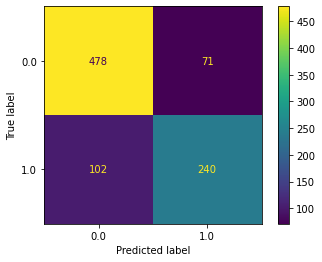

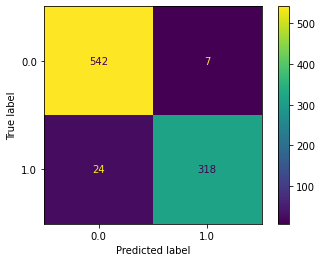

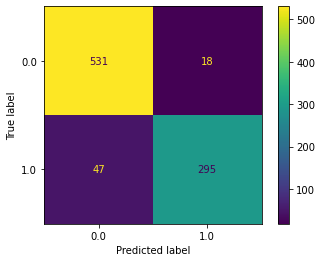

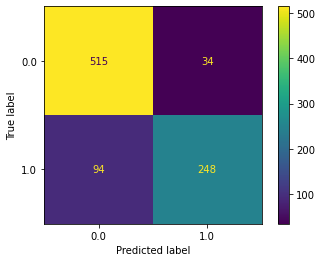

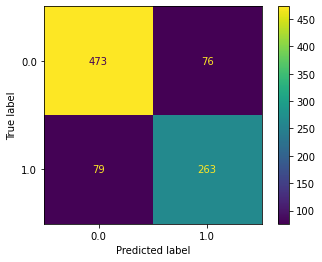

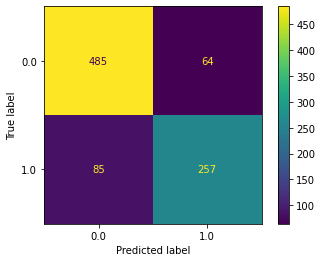

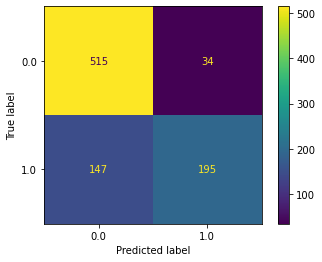

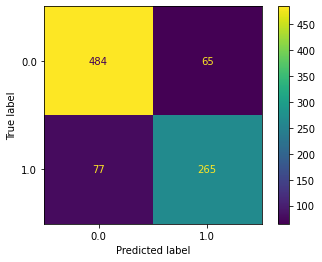

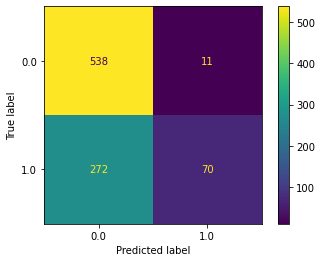

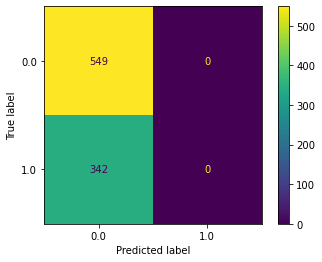

In [14]:
from sklearn.metrics import plot_confusion_matrix

print("Accuracy on training set")
for model in fitted_model:
    score = model.score(train_x, train_y)
    print("Accuracy:",score," --> ",model )
for model in fitted_model:
    print(model)
    plot_confusion_matrix(model, train_x, train_y)
    

### Prediction on the test set

In [ ]:
test_pred ={}
i = 0
for model in fitted_model:
    test_pred[model] = model.predict(test_x)
    new = pd.DataFrame()
    new['PassengerId'] = test['PassengerId']
    new['Survived'] = test_pred[model].astype('int64')
    new.to_csv( str(i)+'.csv',index = False)
    i+=1
